In [97]:
from langgraph.graph  import StateGraph ,START, END
from typing import TypedDict, Dict
import operator
from typing_extensions import Annotated

In [98]:
class batsman(TypedDict):
    runs: Annotated[int, operator.add]
    balls: Annotated[int, operator.add]
    sixes: Annotated[int, operator.add]
    fours: Annotated[int, operator.add]

    sr: float
    ball_per_boundry: int
    boundry_percentage: float

In [99]:
def calculate_sr(batsman: batsman) -> batsman:
    batsman['sr'] = (batsman['runs'] / batsman['balls']) * 100
    return {'sr': batsman['sr']}

In [100]:
def calculate_ball_per_boundry(batsman: batsman) -> batsman:
    if batsman['fours'] + batsman['sixes'] == 0:
        batsman['ball_per_boundry'] = 0
    else:
        batsman['ball_per_boundry'] = batsman['balls'] / (batsman['fours'] + batsman['sixes'])
    return {'ball_per_boundry': batsman['ball_per_boundry']}


In [101]:
def calculate_boundry_percentage(batsman: batsman) -> batsman:
    if batsman['balls'] == 0:
        batsman['boundry_percentage'] = 0.0
    else:
        batsman['boundry_percentage'] = ((batsman['fours'] + batsman['sixes']) / batsman['balls']) * 100
    return {'boundry_percentage': batsman['boundry_percentage']}

In [102]:
def summarize(batsman: batsman) -> batsman:
    summary = {
        'runs': batsman['runs'],
        'balls': batsman['balls'],
        'sixes': batsman['sixes'],
        'fours': batsman['fours'],
        'sr': batsman['sr'],
        'ball_per_boundry': batsman['ball_per_boundry'],
        'boundry_percentage': batsman['boundry_percentage']
        
    }
    return {'summary': summary}

In [103]:
# The batsman state graph
graph = StateGraph(batsman)
graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_ball_per_boundry',calculate_ball_per_boundry)
graph.add_node('calculate_boundry_percentage',calculate_boundry_percentage)
graph.add_node('summarize', summarize)

# Define the workflow
graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_ball_per_boundry')
graph.add_edge(START, 'calculate_boundry_percentage')
graph.add_edge('calculate_sr', 'summarize')
graph.add_edge('calculate_ball_per_boundry', 'summarize')
graph.add_edge('calculate_boundry_percentage', 'summarize')
graph.add_edge('summarize', END)
workflow=graph.compile()

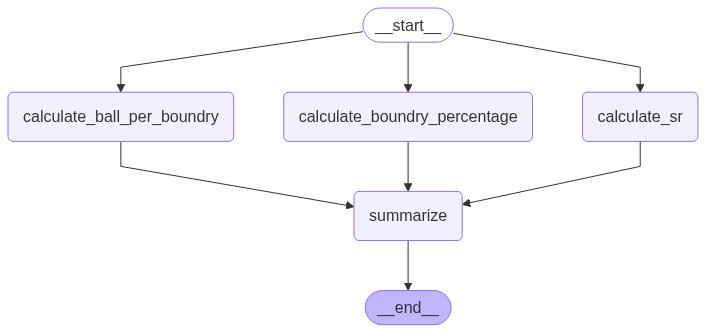

In [104]:
graph.compile()

In [112]:
initial_state = ({
    'runs': 100,
    'balls': 50,
    'sixes': 5,
    'fours': 10,
    'summarize': summarize
})

final_state = workflow.invoke(initial_state)
print(final_state)
  # Print the summary of the batsman

{'runs': 100, 'balls': 50, 'sixes': 5, 'fours': 10, 'sr': 200.0, 'ball_per_boundry': 3.3333333333333335, 'boundry_percentage': 30.0}
